<a href="https://colab.research.google.com/github/TheAliAjami/test-repo/blob/master/livestock_barn_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
import shutil
#shutil.rmtree('train')

# Upload and unzip file

In [34]:
# Replace the id and filename in the below codes
!unzip train.zip

Archive:  train.zip
  inflating: train.csv               
  inflating: train/001-0.jpg         
  inflating: train/002-1.jpg         
  inflating: train/003-1.jpg         
  inflating: train/004-0.jpg         
  inflating: train/005-1.jpg         
  inflating: train/006-1.jpg         
  inflating: train/007-0.jpg         
  inflating: train/008-0.jpg         
  inflating: train/009-1.jpg         
  inflating: train/010-0.jpg         
  inflating: train/011-0.jpg         
  inflating: train/012-0.jpg         
  inflating: train/013-0.jpg         
  inflating: train/014-0.jpg         
  inflating: train/015-1.jpg         
  inflating: train/016-0.jpg         
  inflating: train/017-1.jpg         
  inflating: train/018-0.jpg         
  inflating: train/019-1.jpg         
  inflating: train/020-0.jpg         
  inflating: train/021-1.jpg         
  inflating: train/022-1.jpg         
  inflating: train/023-0.jpg         
  inflating: train/024-0.jpg         
  inflating: train/025-0.jpg  

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv3D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [0]:
train = pd.read_csv('train.csv')


In [68]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i], target_size=(256,256))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 236/236 [00:00<00:00, 435.48it/s]


In [0]:
y=train['label'].values
y = to_categorical(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [73]:
Model = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


Train on 188 samples, validate on 48 samples
Epoch 1/30
188/188 [==============================] - 29s 154ms/step - loss: 1.0280 - acc: 0.5372 - val_loss: 0.6923 - val_acc: 0.5208
Epoch 2/30
188/188 [==============================] - 28s 150ms/step - loss: 0.6922 - acc: 0.5426 - val_loss: 0.6897 - val_acc: 0.4792
Epoch 3/30
188/188 [==============================] - 28s 148ms/step - loss: 0.6870 - acc: 0.5053 - val_loss: 0.6819 - val_acc: 0.4792
Epoch 4/30
188/188 [==============================] - 28s 148ms/step - loss: 0.6677 - acc: 0.6170 - val_loss: 0.6492 - val_acc: 0.6458
Epoch 5/30
188/188 [==============================] - 28s 149ms/step - loss: 0.6278 - acc: 0.6489 - val_loss: 0.6708 - val_acc: 0.6250
Epoch 6/30
188/188 [==============================] - 28s 150ms/step - loss: 0.6605 - acc: 0.6117 - val_loss: 0.6150 - val_acc: 0.5833
Epoch 7/30
188/188 [==============================] - 28s 149ms/step - loss: 0.5569 - acc: 0.7234 - val_loss: 0.5725 - val_acc: 0.7292
Epoch 8/30

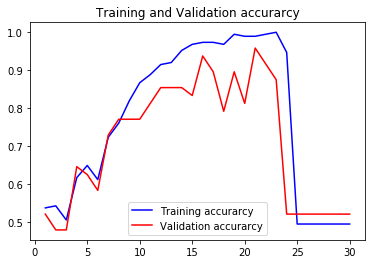

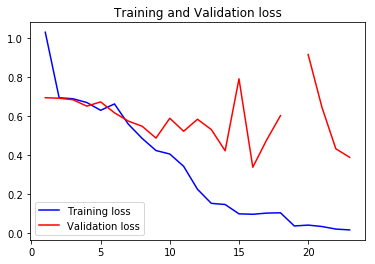

In [74]:
acc = Model.history['acc']
val_acc = Model.history['val_acc']
loss = Model.history['loss']
val_loss = Model.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [75]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

NameError: ignored

In [0]:
!unzip test.zip

In [0]:
test = pd.read_csv('test.csv')

In [0]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['id'][i], target_size=(256,256))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

In [0]:
i = 0
text_labels = []
plt.figure(figsize=(30,30))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()
#prediction = model.predict_classes(test)

In [0]:
#accuracy = sample['label'] = prediction